# <font color='purple'>Machine Learning Lab 6 - Clustering Methods - Comparison </font>
<hr/>

Submitted by<br>
Name: **stebin george<br>
Register number: **21122061**<br>
Class: **MSc Data Science**<br>
Time taken: 7 hrs approx.
<hr/>

## Lab Overview

### Objectives

Perform Clustering Methods
- KMeans Clustering
- Agglomerative Hierarchical clustering

and compare both clustering methods

### Problem definition 

KMeans clustering is a classification algorithm where we divide data into clusters which can be equal to or more than the numbers.This algorithm categorize the features of the dataset into k groups of similarity. Euclidean distance measurement is used as a measurement to calculate similarity.

### Approach

I have used the help of some internet sources to complete this lab assignment. Also I have used the help of previous lab assignments.

### Sections
 1. Importing necessary libraries
 1. Importing data
 1. About the dataset
 1. Exploratory Data Analysis
 1. Visualizations
 1. KMeans Clustering
 1. Visualizing Clusters
 1. Agglomerative Hierarchical clustering
 1. Visualizing Dendrogram
 1. Visualizing Clusters
 1. Accuracy check
 1. Conclusion

### References

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
1. https://www.geeksforgeeks.org/clustering-in-machine-learning/
1. https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/
1. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
1. https://www.kaggle.com/

### Question:

Illustrate KMeans and Agglomerative Hierarchical Clustering on Iris Dataset, considering only two features - Sepal Length and Petal Width.
Use Elbow Method as a way to find optimum number of clusters


### Results

### Importing necessary libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [327]:
iris = pd.read_csv(r"C:\Users\HP\Documents\MSc DATA SCIENCE\2nd sem\ML datasets\IRIS.csv")

### About the dataset

This is the Iris flower dataset. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### Exploratory Data Analysis

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [171]:
df = iris.drop(['sepal_width', 'petal_length'], axis = 1)
df.head()

,sepal_length,petal_width,species
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


In [27]:
df.shape

(150, 3)

There are 150 rows and 3 columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   species       150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [29]:
#unique values of species and their counts
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [30]:
#checking for null values
df.isna().any()

sepal_length    False
petal_width     False
species         False
dtype: bool

In [54]:
# calculating some statistical values
df.iloc[:,[0,1]].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5


In [50]:
#correlation
df.corr()

,sepal_length,petal_width
sepal_length,1.000000,0.817954
petal_width,0.817954,1.000000


The two features are highly correlated

### Visualizations

<AxesSubplot:>

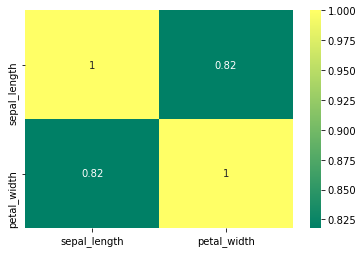

In [56]:
sns.heatmap(df.corr(), annot = True, cmap = "summer")

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

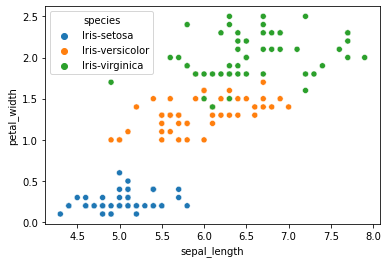

In [58]:
sns.scatterplot(x = 'sepal_length', y = 'petal_width',hue = 'species', data = df)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

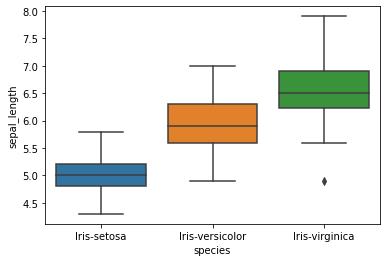

In [59]:
sns.boxplot(x = 'species', y = 'sepal_length', data = df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

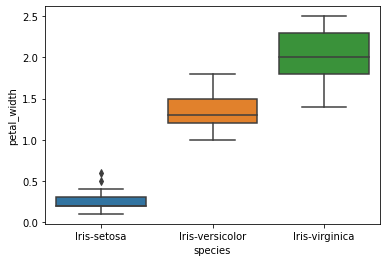

In [60]:
sns.boxplot(x = 'species', y = 'petal_width', data = df)

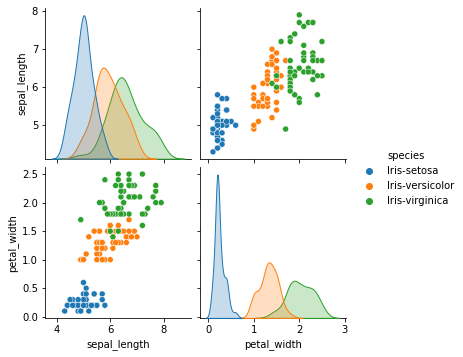

In [61]:
sns.pairplot(df, hue="species")

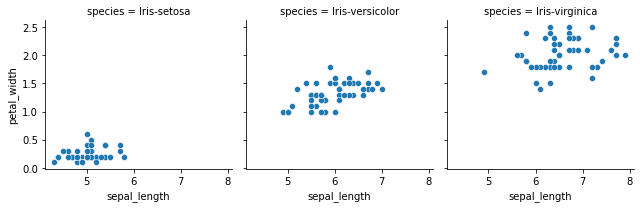

In [65]:
g = sns.FacetGrid(df, col="species")
g.map(sns.scatterplot, "sepal_length", "petal_width")

### K-Means Clustering

In [353]:
x = df.iloc[:,[0,1]].values

**1. Finding the optimum number of clusters for k-means classification using Elbow method.**

In [354]:
wcss = []  #Within Cluster Sum of Squares

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    km.fit(x)
    wcss.append(km.inertia_)

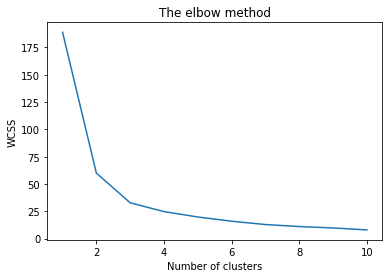

In [355]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the elbow point is at 3. So the optimum number of clusters will be 3

### Implementing

In [356]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_km = km.fit_predict(x)

In [357]:
labels = km.labels_

In [358]:
pred = pd.DataFrame({'actual_labels':labels, 'predicted_labels':y_km})
pred.head()

,actual_labels,predicted_labels
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


### Visualizing the clusters

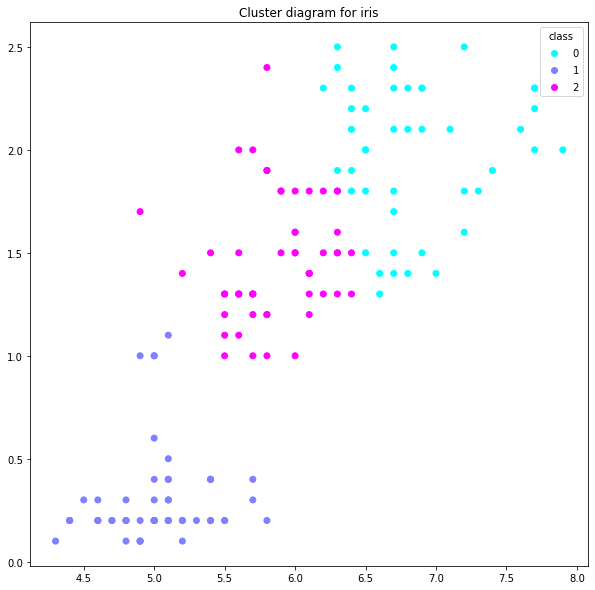

In [360]:
newdata1 = iris.drop(['sepal_width', 'petal_length'], axis = 1)
newdata1['Predicted'] = y_km
fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(x = newdata1['sepal_length'], y = newdata1['petal_width'], c = newdata['Predicted'], cmap = 'cool')

ax.set(title = "Cluster diagram for iris")
ax.legend(*scatter.legend_elements(), title = 'class')


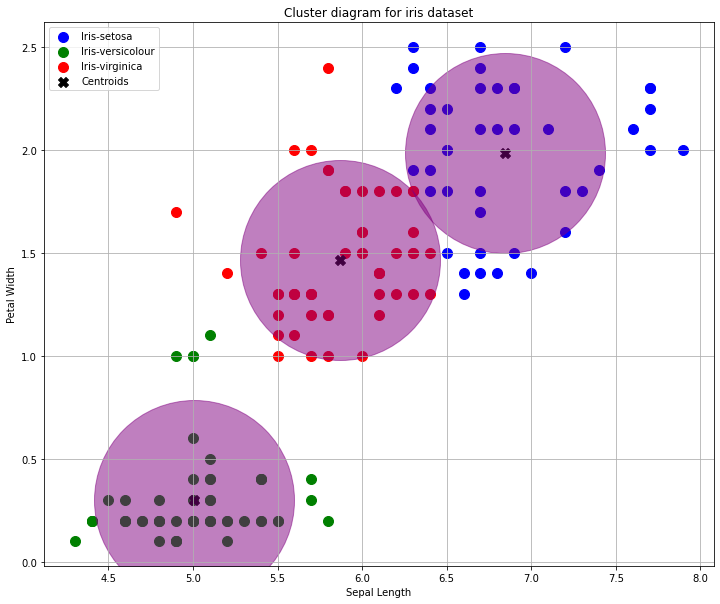

In [361]:
plt.figure(figsize=(12,10))
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

#plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = "X")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 40000, c = 'purple', alpha=0.5, marker="o")
plt.title("Cluster diagram for iris dataset")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()

In [362]:
#The centroid coordinates are:
km.cluster_centers_

array([[6.84318182, 1.98409091],
       [5.00555556, 0.30185185],
       [5.86730769, 1.46538462]])

## Agglomerative Hierarchical Clustering

In [363]:
x = df.iloc[:,[0,1]].values

### Visualizing dendogram

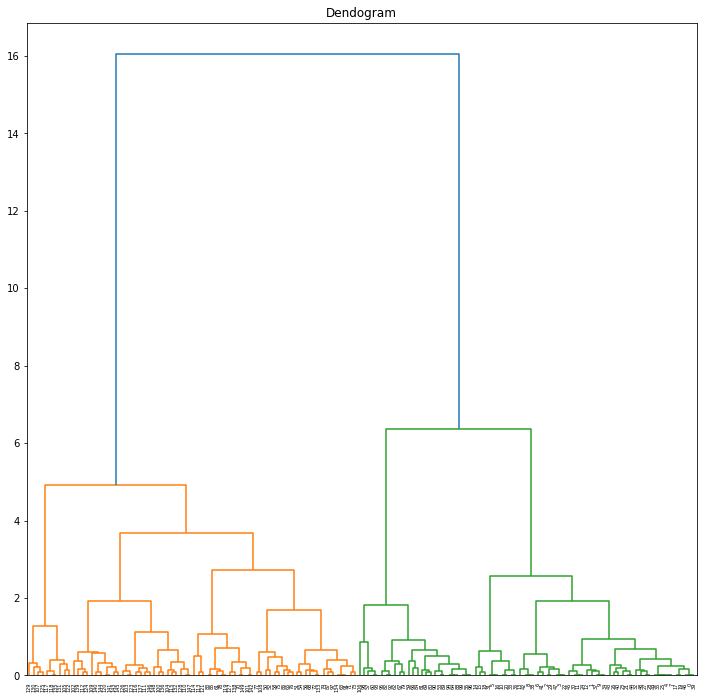

In [364]:
plt.figure(figsize =(12,12))
plt.title('Dendogram')
link = hierarchy.linkage(x,'ward')
dend = hierarchy.dendrogram(link)
plt.show()

From the dendrogram, we understand that the optimum number of clusters are 2.

In [365]:
agg = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_agg = agg.fit_predict(x)

### Visualizing different clusters

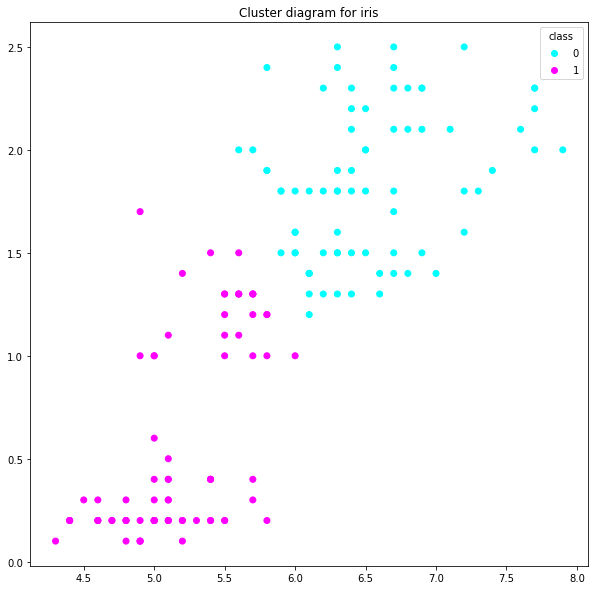

In [366]:
newdata2 = iris.drop(['sepal_width', 'petal_length'], axis = 1)
newdata2['Predicted'] = y_agg
fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(x = newdata2['sepal_length'], y = newdata2['petal_width'], c = newdata2['Predicted'], cmap = 'cool')

ax.set(title = "Cluster diagram for iris")
ax.legend(*scatter.legend_elements(), title = 'class')


But we actually have 3 clusters. So we can do for 3 clusters also

In [367]:
agg2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_agg2 = agg2.fit_predict(x)

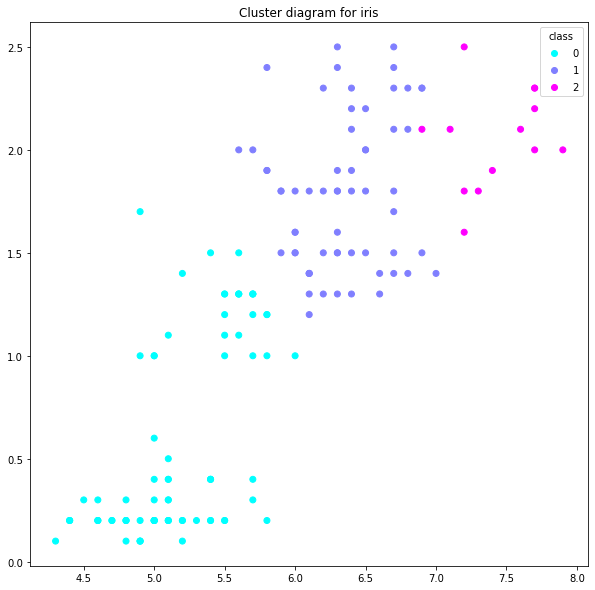

In [368]:
newdata3 = iris.drop(['sepal_width', 'petal_length'], axis = 1)
newdata3['Predicted'] = y_agg2
fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(x = newdata3['sepal_length'], y = newdata3['petal_width'], c = newdata3['Predicted'], cmap = 'cool')

ax.set(title = "Cluster diagram for iris")
ax.legend(*scatter.legend_elements(), title = 'class')

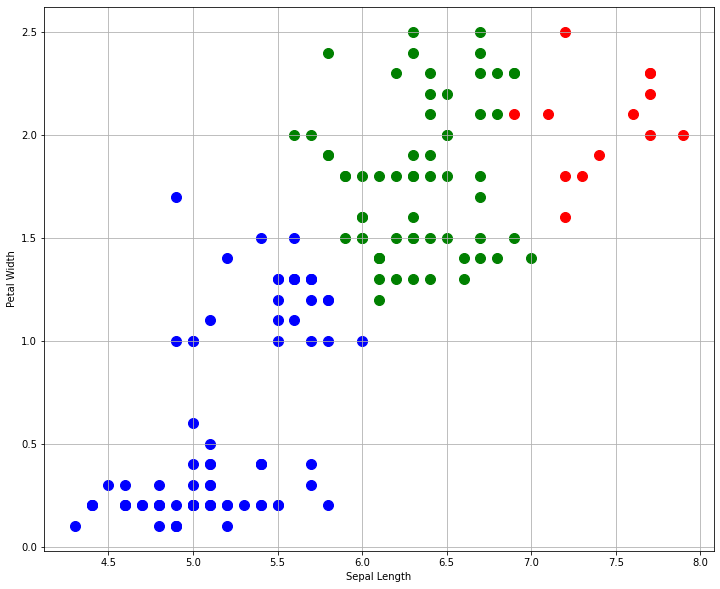

In [369]:
plt.figure(figsize=(12,10))
plt.scatter(x[y_agg2 == 0, 0], x[y_agg2 == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_agg2 == 1, 0], x[y_agg2 == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_agg2 == 2, 0], x[y_agg2 == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.grid()


In [370]:
data = iris.drop(['sepal_width', 'petal_length'], axis = 1)
data['KMeans'] = y_km
data['Agglomerative'] = y_agg2
data.head()

,sepal_length,petal_width,species,KMeans,Agglomerative
0,5.1,0.2,Iris-setosa,1,0
1,4.9,0.2,Iris-setosa,1,0
2,4.7,0.2,Iris-setosa,1,0
3,4.6,0.2,Iris-setosa,1,0
4,5.0,0.2,Iris-setosa,1,0


In [371]:
data.tail()

,sepal_length,petal_width,species,KMeans,Agglomerative
145,6.7,2.3,Iris-virginica,0,1
146,6.3,1.9,Iris-virginica,0,1
147,6.5,2.0,Iris-virginica,0,1
148,6.2,2.3,Iris-virginica,0,1
149,5.9,1.8,Iris-virginica,2,1


## Accuracy Check

### Accuracy calculation of KMeans Clustering

In [372]:
data1 = data.iloc[:,[0,1,2,3]]
data1['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [1,2,0],inplace = True)
predicted_kmeans=0
for i in range(len(data1)):
    if data1['species'][i] == data1['KMeans'][i]:
        predicted_kmeans += 1

In [380]:
accuracy_kmeans = (predicted_kmeans/150)*100
print("The accuracy of KMeans clustering is {} ".format(round(accuracy_kmeans)))

The accuracy of KMeans clustering is 81 


### Accuracy calculation of Agglomerative Hierarchical Clustering

In [374]:
data2 = data.iloc[:,[0,1,2,4]]
data2['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,2,1],inplace = True)
predicted_agg = 0
for i in range(len(data2)):
    if data2['species'][i] == data2['Agglomerative'][i]:
        predicted_agg += 1

In [379]:
accuracy_agglomerative = (predicted_agg/150)*100
print("The accuracy of KMeans clustering is {} ".format(round(accuracy_agglomerative)))

The accuracy of KMeans clustering is 57 


### Conclusion

- In KMeans clustering, we have to give the number of clusters to be divided. The number of clusters are found using Elbow method.
- In Agglomerative hierarchical clustering, we don't have to manually give the number of clusters. The optimum number of clusters can be found from the dendrogram. 
- From the above dataframe we can understand that, in KMeans clustering the labels are given as
   - iris-setosa - 1
   - iris-virginica - 0 
   - iris-versicolor - 2
   
   But in Agglomerative hierarchical clustering, the labels given are
   
   - iris-setosa - 0
   - iris-virginica - 1
   - iris-versicolor - 2
   
- The accuracy of KMeans clustering is 81.
- The accuracy of Agglomerative Hierarchical clustering is 57.